It was so shocking to hear the demise of the "hero of LA lakers".I live at thousand oaks and hearing the incident, early sunday morning hit me hard.Life seems to be so unfair.I am not a fan of basket ball but this incident made me blow.I couldn't take it and thoughts how his fans would be at the very moment.I pray god to give strength to his family and fans.
As a part of a tribute,I wanted to have a data walkthrough on his 20 years of basketball career.RIP the legend.

Extracting a data set from Kaggle to predict the shots of Kobe's 20 years of basketball career.

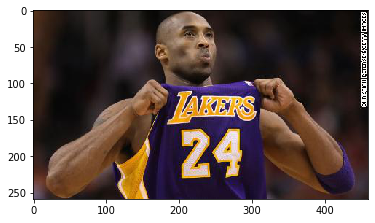

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
image = mpimg.imread("kobe.jpg")
plt.imshow(image)
plt.show()
kobe = pd.read_csv('kobe.csv')

In [49]:
kobe.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


We could see that the data set contains 25 columns and 30697 entries.
The column name shot_made_flag has only 25697 entries and needs futher inspection for the missing values since this is our prime column of analysis 

In [7]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

The short_made_flag is represented either as 1 or 0,1 indicating the shot was made and 0 indicating the miss of shot by Kobe.

We need to erradicate these NAN for futher analysis.We could not predict the NAN as either 1 or 0 and hence neglecting those would be a wise option.

In [8]:
kobe_new =kobe.dropna(axis=0)
kobe_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
action_type           25697 non-null object
combined_shot_type    25697 non-null object
game_event_id         25697 non-null int64
game_id               25697 non-null int64
lat                   25697 non-null float64
loc_x                 25697 non-null int64
loc_y                 25697 non-null int64
lon                   25697 non-null float64
minutes_remaining     25697 non-null int64
period                25697 non-null int64
playoffs              25697 non-null int64
season                25697 non-null object
seconds_remaining     25697 non-null int64
shot_distance         25697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             25697 non-null object
shot_zone_area        25697 non-null object
shot_zone_basic       25697 non-null object
shot_zone_range       25697 non-null object
team_id               25697 non-null int64
team_name         

KOBE'S FREQUENT AND RARE SHOTS

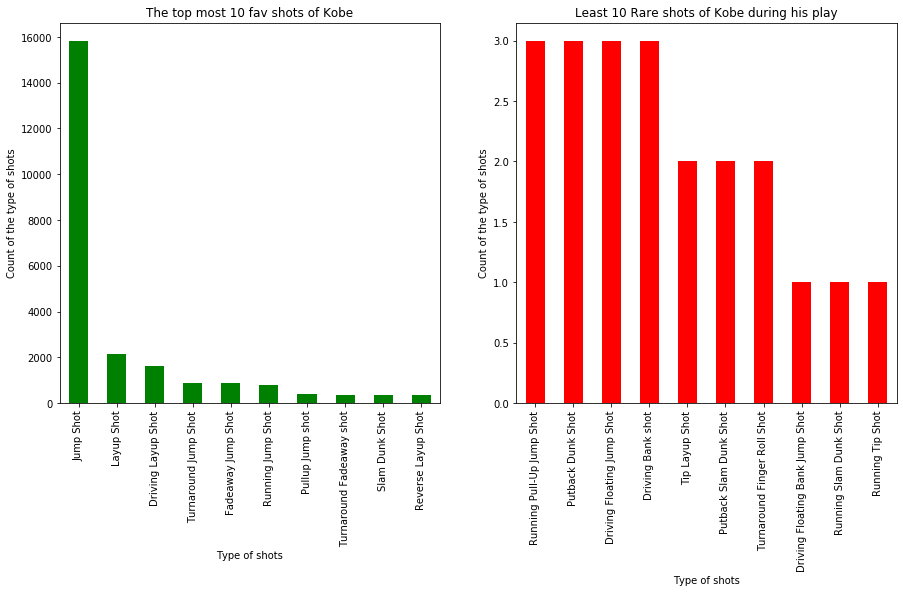

In [37]:
plt.subplots(1, 2, figsize=(15, 7), sharey=True)
colors = list('rgbcmyk')
plt.subplot(121)
kobe_new['action_type'].value_counts().head(10).plot.bar(color='green')
plt.xlabel('Type of shots')
plt.ylabel('Count of the type of shots')
plt.title('The top most 10 fav shots of Kobe')
plt.subplot(122)
kobe_new['action_type'].value_counts().tail(10).plot.bar(color='red')
plt.xlabel('Type of shots')
plt.ylabel('Count of the type of shots')
plt.title('Least 10 Rare shots of Kobe during his play')
plt.show()


KOBE'S FREQUENCY OF SHOT MADE AND MISSED

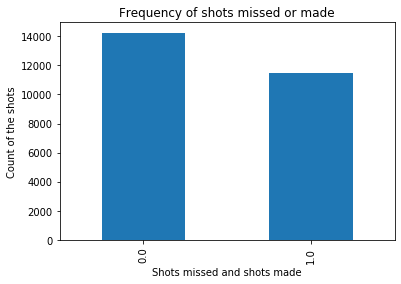

In [39]:
kobe_new['shot_made_flag'].value_counts().plot.bar()
plt.xlabel('Shots missed and shots made')
plt.ylabel('Count of the shots')
plt.title('Frequency of shots missed or made')
plt.show()

In [40]:
kobe_new['team_name'].unique()

array(['Los Angeles Lakers'], dtype=object)

Kobe is the only player who had played for the same team (LA LAKERS)throughout his career

KOBE'S SHOTS BASES ON THE ZONE AREA

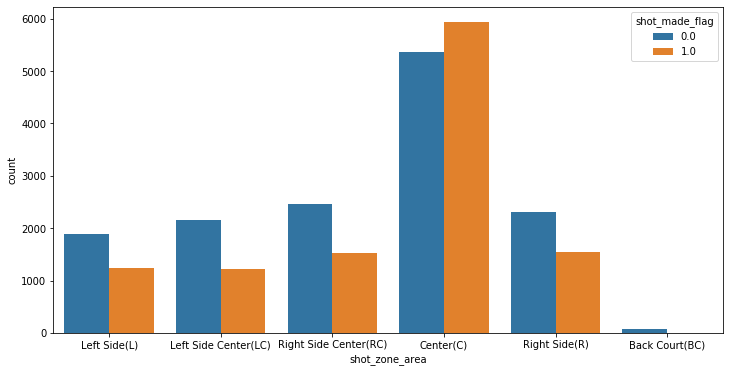

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_area",hue="shot_made_flag",data=kobe_new)

Most of his shots made was on the centre zone area

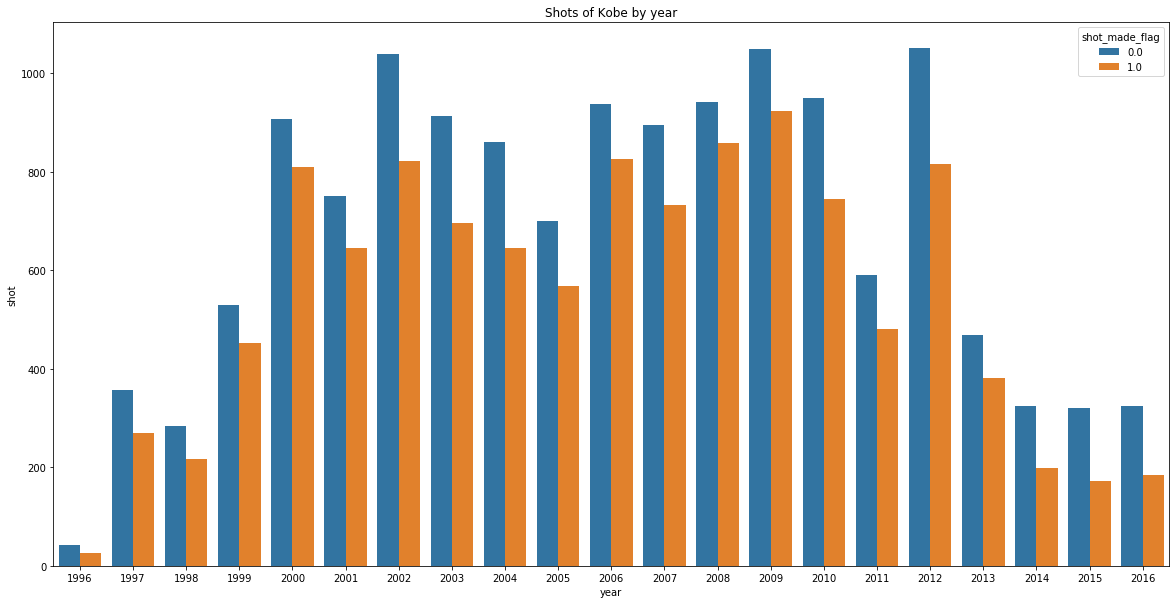

In [65]:
kobe_new_date = pd.to_datetime(kobe['game_date'])
kobe_new['year']= kobe_new_date.dt.year
plt.figure(figsize=(20,10))
sns.countplot(x='year',hue='shot_made_flag',data=kobe_new)
plt.title('Shots of Kobe by year')
plt.xlabel('year')
plt.ylabel('shot')
plt.show()

# "The most important thing in life is how your career moves and touches those around you,and how it carries forward to the next generation"-Kobe Bryant